# IPL 2022 Data Analysis

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [165]:
ipl = pd.read_csv('ipl_2022_dataset.csv')
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [166]:
ipl.shape

(633, 8)

In [167]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [168]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [169]:
ipl.drop('Unnamed: 0', axis=1, inplace = True)

In [170]:
ipl.head(2)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans


In [171]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [172]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [173]:
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)

In [174]:
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [175]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [176]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [177]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [178]:
team = ipl[ipl['COST IN ₹ (CR.)'] > 0]['Team'].unique()
team

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [179]:
ipl['Status'] = ipl['Team'].replace(team, 'Sold')

In [180]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [181]:
ipl.duplicated().sum()

1

In [182]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [183]:
# How many player participated in ipl 2022 Auction

ipl.shape[0]

633

In [184]:
# How many types of player have participated

types = ipl['TYPE'].value_counts().reset_index()
types

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


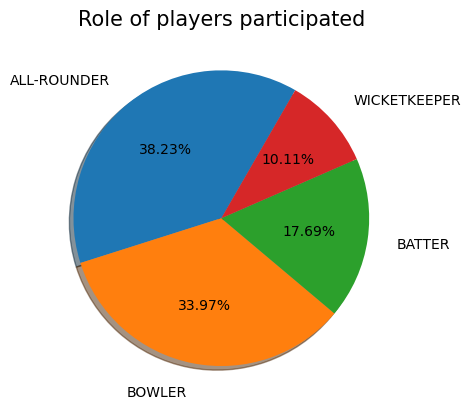

In [185]:
plt.pie(types['count'], labels=types['TYPE'],labeldistance=1.2, autopct = '%1.2f%%', shadow=True, startangle=60)
plt.title('Role of players participated', fontsize=15)
plt.show()

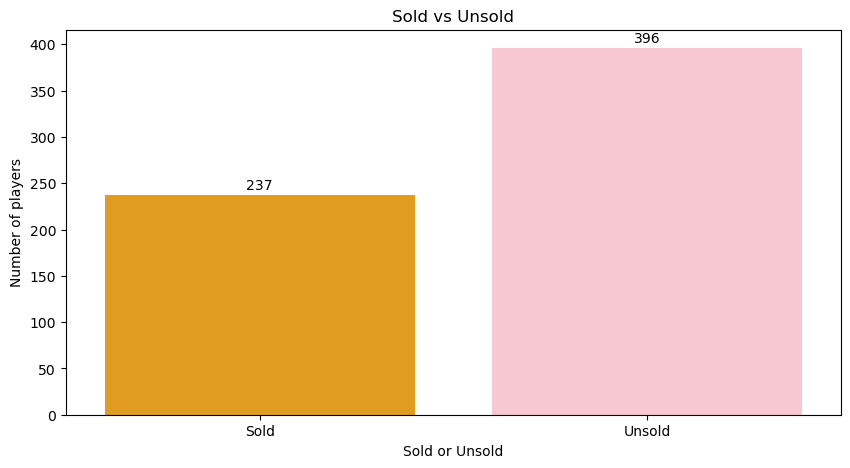

In [186]:
# Player sold and unsold using bargraph

plt.figure(figsize=(10,5))
fig = sns.countplot(data=ipl, x='Status', palette=['orange','pink'])
plt.title('Sold vs Unsold')
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of players')


for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
                 p.get_width() / 2., p.get_height()), ha='center', va='center', 
                 xytext=(0,7), textcoords = 'offset points')


plt.show()

In [187]:
ipl.groupby('Status')['Player'].count()

Status
Sold      237
Unsold    396
Name: Player, dtype: int64

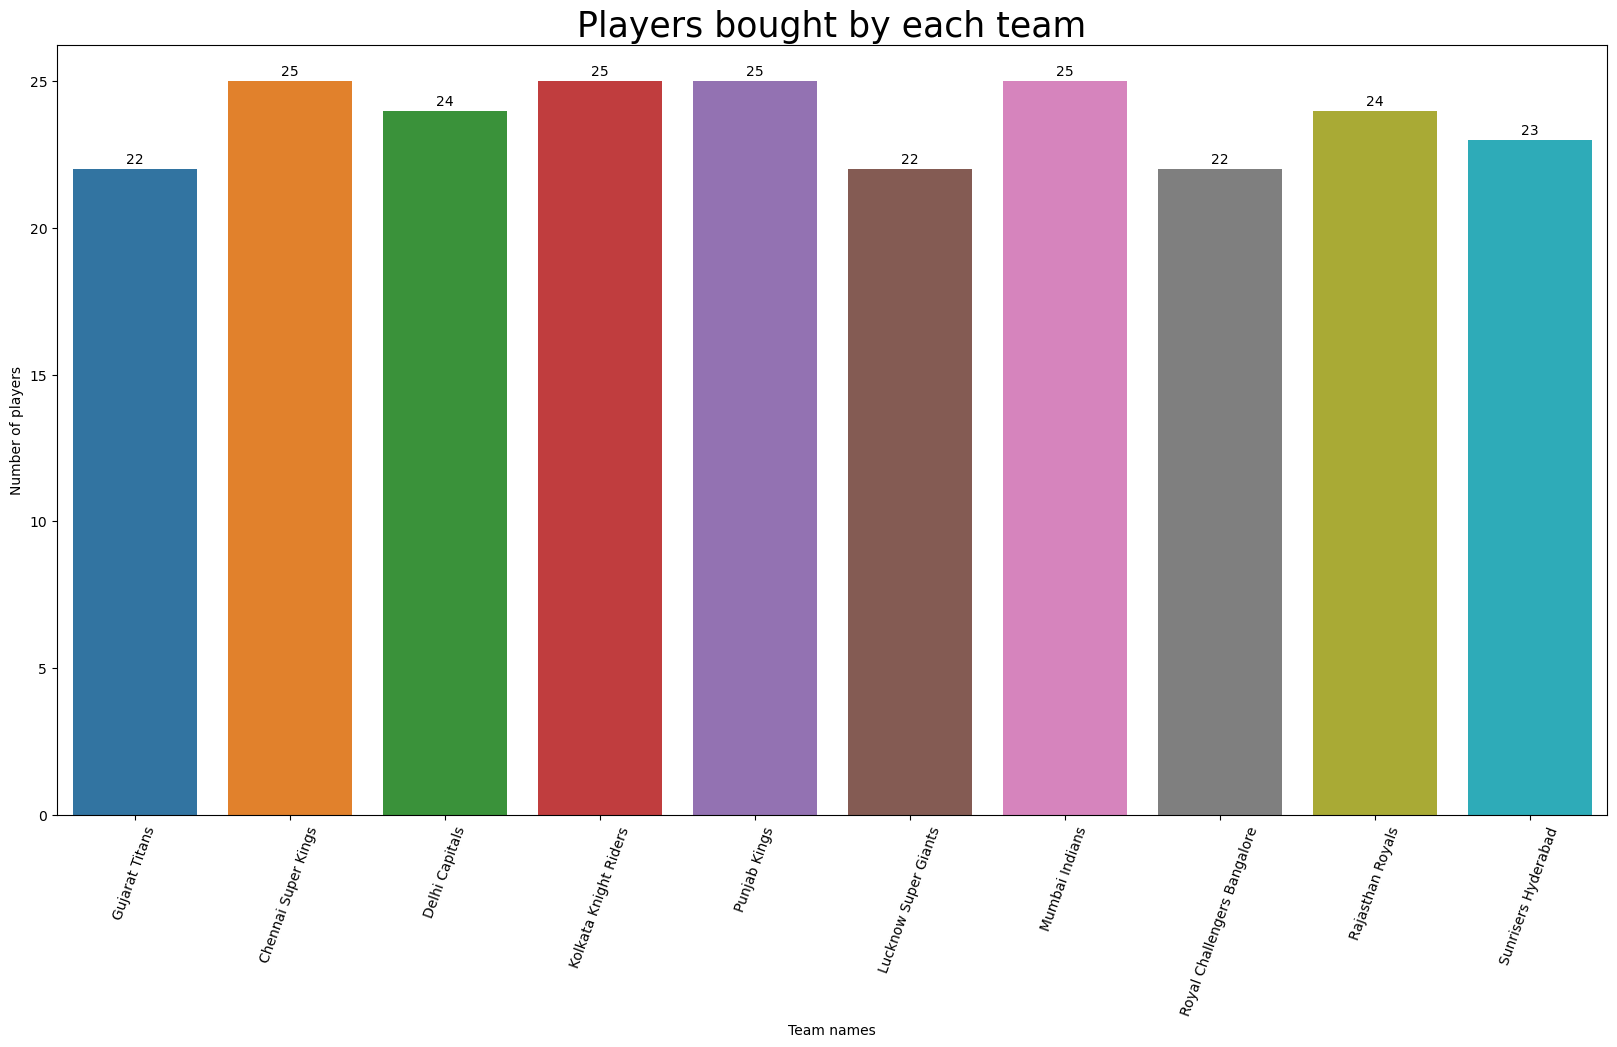

In [188]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data=ipl, x=ipl[ipl['Team']!='Unsold']['Team'])
plt.title('Players bought by each team', fontsize=25)
plt.xlabel('Team names')
plt.ylabel('Number of players')
plt.xticks(rotation=70)


for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
                 p.get_width() / 2., p.get_height()), ha='center', va='center', 
                 xytext=(0,7), textcoords = 'offset points')
    
    
plt.show()

In [189]:
ipl['retention'] = ipl['Base Price']

In [190]:
ipl['retention'].replace(['2 Cr', '40 Lakhs', '20 Lakhs', '1 Cr', '75 Lakhs', '50 Lakhs', '30 Lakhs', '1.5 Cr'], 'From Auction', inplace=True)

In [191]:
ipl['Base Price'].replace('Draft Pick', 0, inplace= True)

In [192]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [193]:
ipl['base_price'].replace('Retained', 0, inplace=True)

In [194]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,40 Lakh,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [195]:
# Total players retained and bought

ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                 retention   
Chennai Super Kings  20 Lakh           9
                     30 Lakh           1
                     50 Lakh           3
                     From Auction      8
                     Retained          4
                                    ... 
Unsold               20 Lakh         261
                     30 Lakh           3
                     40 Lakh           8
                     50 Lakh          79
                     75 Lakh          11
Name: retention, Length: 66, dtype: int64

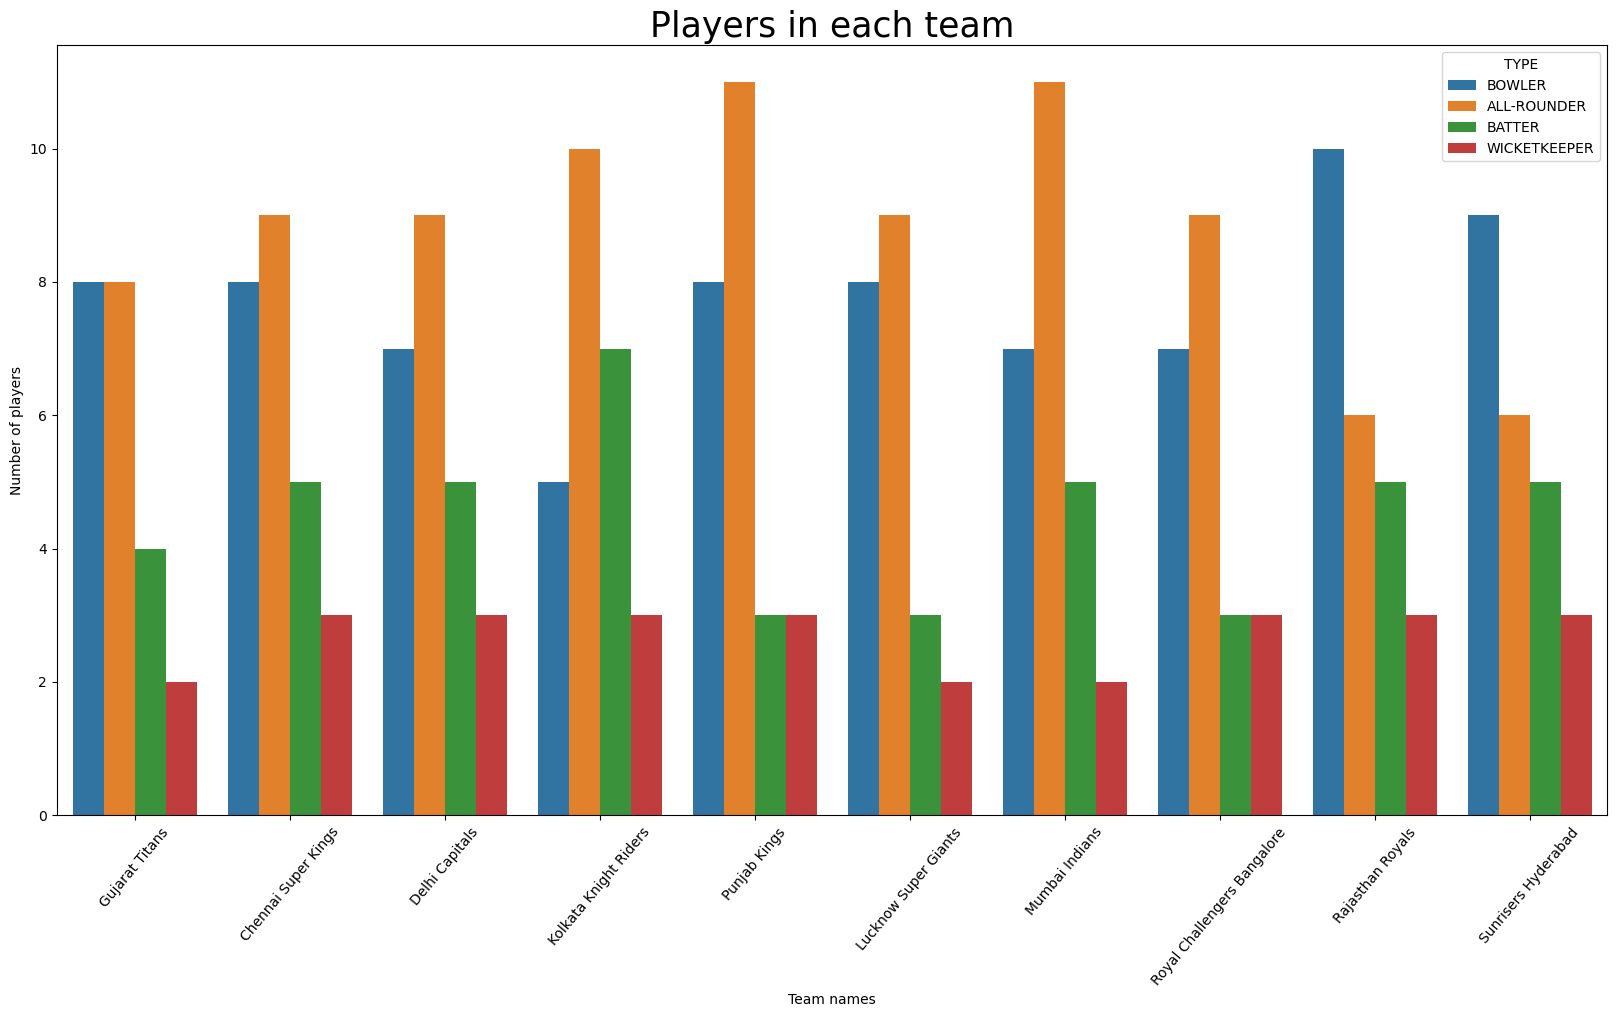

In [202]:
plt.figure(figsize=(20,10))
fig = sns.countplot(data=ipl, x=ipl[ipl['Team']!='Unsold']['Team'], hue='TYPE')
plt.title('Players in each team', fontsize=25)
plt.xlabel('Team names')
plt.ylabel('Number of players')
plt.xticks(rotation=50)
plt.show()

In [205]:
# Highest amount spend on a single player by each team.

ipl[ipl['retention'] == 'From Auction'].groupby('Team')['COST IN ₹ (CR.)'].max().sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Rajasthan Royals               10.00
Lucknow Super Giants            8.75
Unsold                          0.00
Name: COST IN ₹ (CR.), dtype: float64

In [209]:
# Players retained at maximum price

ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)', ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,0


In [215]:
# Top 5 bowlers

ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)', ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction,Cr,2
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction,Cr,1
98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings,Sold,From Auction,Cr,2


In [216]:
ipl = ipl.rename(columns = {'2021 Squad' : 'Prev_team'})

In [219]:
unsold_players = ipl[(ipl['Prev_team'] != 'Not Participated') & (ipl['Team'] == 'Unsold')][['Player', 'Prev_team']]

In [220]:
unsold_players

,Player,Prev_team
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB
